# Numerical Experiments with the Propagation Matrix

The agoal of this notebook is to further investigate the behaiour of the Propagation matrix. As right had side the Advection equation was used.
The first Idea was to consider the Propagation Matrix as a linear combination of the propagation matrices of the seperate steps. Then it would it was tried to investigate if it is possible to create a linear combination of these for which a given vector with  $u_i = 1$ for $i=n$ and $u_i = 0$ elswere  would lead to a positive u. This is equivalent to the collum n having only entries $\geq$ 0. 

This is not possible for the advection with circular boundaries. If there is a feasible b for one special n then the same b would also be feasible for any other n. This cannot be true because this would enshure the general positifity.

If the advection doesn't have circular boundaries it maybe is possible, but gets increaasingly more difficult when the n gets smaler.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nodepy import rk
import cvxpy as cp


import numpy.linalg as linalg


#Diagonally Implicit methods:
BE = rk.loadRKM('BE').__num__()
SDIRK23 = rk.loadRKM('SDIRK23').__num__()
SDIRK34 = rk.loadRKM('SDIRK34').__num__()
SDIRK54 = rk.loadRKM('SDIRK54').__num__()
TR_BDF2 = rk.loadRKM('TR-BDF2').__num__()


be = rk.loadRKM('BE').__num__()

#Extrapolation method
ex2 = rk.extrap(2,'implicit euler').__num__()
ex3 = rk.extrap(3,'implicit euler').__num__()
ex4 = rk.extrap(4,'implicit euler').__num__()
ex5 = rk.extrap(4,'implicit euler').__num__()
ex6 = rk.extrap(6,'implicit euler').__num__()
ex8 = rk.extrap(8,'implicit euler').__num__()



In [2]:
def generate_G(rkm,L,dt):
    b_orig = rkm.b
    s = len(rkm.b)
    G= ['?'] * s
    for i in range(s):
        b = np.zeros_like(b_orig)
        b[i] =1
        rkm.b = b
        (G_,X) = rkm.propagation_matrix(L,dt)
        G[i] = G_
    return G
    
    

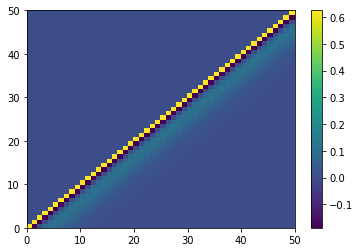

In [3]:
N = 50
A= (-np.diag(np.ones(N))+np.diag(np.ones(N-1),1))
G = generate_G(ex3,A,3)
(G_,X) = ex3.propagation_matrix(A,3)
plt.pcolor(G_)
plt.colorbar()

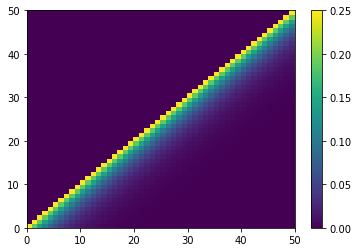

In [4]:
plt.pcolor(G[0])
plt.colorbar()

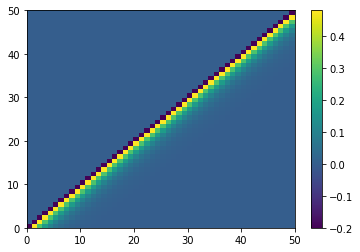

In [5]:
plt.pcolor(G[1])
plt.colorbar()

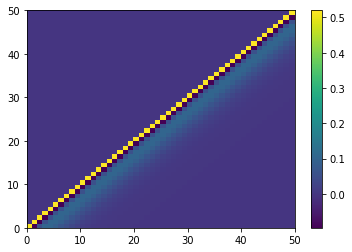

In [6]:
plt.pcolor(G[2])
plt.colorbar()

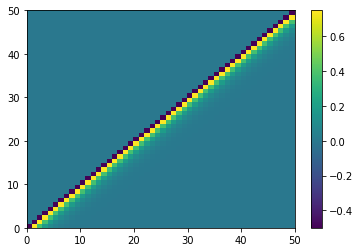

In [7]:
plt.pcolor(G[3])
plt.colorbar()

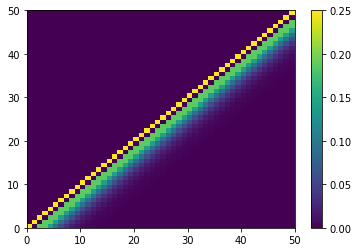

In [8]:
plt.pcolor(G[4])
plt.colorbar()

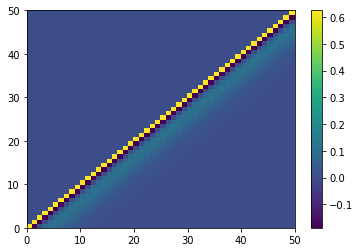

In [9]:
plt.pcolor(G[5])
plt.colorbar()

Investigating if negative values apear due to the cropping of the matrix exponential or if the neagtive valeus are caused by erors in the discretisation. 

The solution for the ODE $u' = Lu$ is $u(t) = exp(Mt) u_0$

Yhis cann be expressed with the Matrix exponential

$$exp(Mt) = \sum_{k=0}^{\infty} \frac{1}{k!}(Mt)^k=\sum_{k=0}^{\infty} \frac{1}{k!}M^kt^k$$

Now we want to investigate why there are negative values appearing in the numeric approximation $u^n$. 
At first we want to test weather negative values appear in a cropped version of the matrix exponential

In [10]:
#set time to 1
t = 0.1

In [11]:
def matrexp(A,power,t):
    exp_trunc = np.zeros_like(A)
    for k in range(power+1):
        exp_trunc += 1/np.math.factorial(k)*t**k*np.linalg.matrix_power(A,k)
    return exp_trunc


In [12]:
print(matrexp(A,0,t))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [13]:
print(matrexp(A,1,t))

[[0.9 0.1 0.  ... 0.  0.  0. ]
 [0.  0.9 0.1 ... 0.  0.  0. ]
 [0.  0.  0.9 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.9 0.1 0. ]
 [0.  0.  0.  ... 0.  0.9 0.1]
 [0.  0.  0.  ... 0.  0.  0.9]]


In [14]:
print(matrexp(A,2,t))

[[0.905 0.09  0.005 ... 0.    0.    0.   ]
 [0.    0.905 0.09  ... 0.    0.    0.   ]
 [0.    0.    0.905 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.905 0.09  0.005]
 [0.    0.    0.    ... 0.    0.905 0.09 ]
 [0.    0.    0.    ... 0.    0.    0.905]]


In [15]:
print(matrexp(A,3,t))

[[0.90483333 0.0905     0.0045     ... 0.         0.         0.        ]
 [0.         0.90483333 0.0905     ... 0.         0.         0.        ]
 [0.         0.         0.90483333 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.90483333 0.0905     0.0045    ]
 [0.         0.         0.         ... 0.         0.90483333 0.0905    ]
 [0.         0.         0.         ... 0.         0.         0.90483333]]


In [16]:
print(matrexp(A,4,t))

[[0.9048375  0.09048333 0.004525   ... 0.         0.         0.        ]
 [0.         0.9048375  0.09048333 ... 0.         0.         0.        ]
 [0.         0.         0.9048375  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.9048375  0.09048333 0.004525  ]
 [0.         0.         0.         ... 0.         0.9048375  0.09048333]
 [0.         0.         0.         ... 0.         0.         0.9048375 ]]


In [20]:
from ipywidgets import interact, IntSlider, FloatSlider




def plot_power(power=0):
    plt.pcolor(np.linalg.matrix_power(A,power),cmap=plt.get_cmap('bwr'),vmin=-4, vmax=4)
    plt.colorbar()
    

In [21]:
interact(plot_power,power=IntSlider(min=0,max=20,value=1));

interactive(children=(IntSlider(value=1, description='power', max=20), Output()), _dom_classes=('widget-intera…

In [19]:
def plot_exp_trunc(power=0,t=t):
    exp_trunc = matrexp(A,power,t)
    
    plt.pcolor(exp_trunc,cmap=plt.get_cmap('bwr'),vmin=-4, vmax=4)
    plt.colorbar()
    
interact(plot_exp_trunc,
         power=IntSlider(min=1,max=20,value=1),
         t=FloatSlider(min=0.,max=2.,step=0.01,value=0.));

interactive(children=(IntSlider(value=1, description='power', max=20, min=1), FloatSlider(value=0.0, descripti…